In [1]:
import numpy as np # linear algebra
from matplotlib import pyplot
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Raw Data 

In [2]:
df_raw = pd.read_csv("bs140513_032310.csv")
df_raw.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
df_raw.isnull().values.any()

False

# Exploratory Data Analysis

In [4]:
df_raw.describe(include='all')

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


In [5]:
# EDA : 1. Example Customer
# a
trans_by_cust = df_raw[df_raw['customer'] == "'C1978250683'"]
fraud_by_cust = df_raw[(df_raw['customer'] == "'C1978250683'") & (df_raw['fraud'] == 1)]
no_fraud_by_cust = df_raw[(df_raw['customer'] == "'C1978250683'") & (df_raw['fraud'] == 0)]
trans_by_cust.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
23511,9,'C1978250683','3','F','28007','M980657600','28007','es_sportsandtoys',274.91,1
24771,9,'C1978250683','3','F','28007','M2011752106','28007','es_hotelservices',867.29,1
25217,10,'C1978250683','3','F','28007','M1198415165','28007','es_wellnessandbeauty',198.42,1
26779,10,'C1978250683','3','F','28007','M980657600','28007','es_sportsandtoys',52.94,1
27976,11,'C1978250683','3','F','28007','M840466850','28007','es_tech',615.84,1


In [6]:
# EDA : 1. Example Customer
# b
num_fraud_trans, num_safe_trans, total_trans = len(fraud_by_cust), len(no_fraud_by_cust), len(trans_by_cust)
percent_frauds = (num_fraud_trans/total_trans * 100)
percent_safe = (100 - percent_frauds)
print("Percentage of frauds by customer C1978250683: ", round(percent_frauds, 2))
print("Percentage of  no frauds by customer C1978250683: ", round(percent_safe, 2))

Percentage of frauds by customer C1978250683:  41.51
Percentage of  no frauds by customer C1978250683:  58.49


In [7]:
# EDA : 1. Example Customer
# c : Summary Description
trans_by_cust['amount'].describe()

count     265.000000
mean      211.188868
std       516.846229
min         0.030000
25%        23.200000
50%        46.920000
75%       231.330000
max      5184.550000
Name: amount, dtype: float64

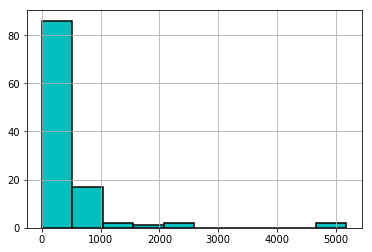

In [8]:
# EDA : 1. Example Customer
# d : Histogram Vizualization fraud
fraud_by_cust['amount'].hist(edgecolor='black', color='c', linewidth=1.5)

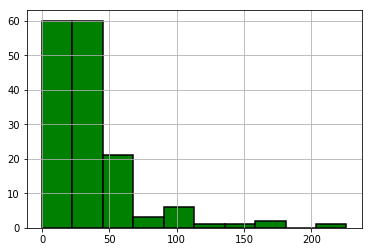

In [9]:
# EDA : 1. Example Customer
# e : Histogram Vizualization No Fraud
no_fraud_by_cust['amount'].hist(edgecolor='black', color='g', linewidth=1.5)

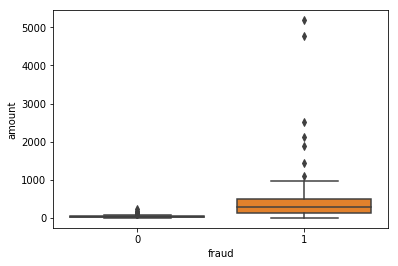

In [10]:
# EDA : 1. Example Customer
# f : Boxplot Vizualization of Fraud
ax = sns.boxplot(x="fraud", y="amount", data=trans_by_cust)

In [11]:
# EDA : 2. Gender
# a : Summary Description
df_raw['gender'].describe()

count     594643
unique         4
top          'F'
freq      324565
Name: gender, dtype: object

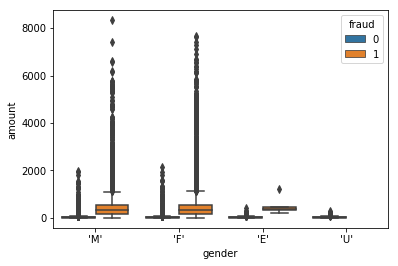

In [12]:
# EDA : 2. Gender
# b : Boxplot Vizualization of Fraud by Gender
ax = sns.boxplot(x="gender", y="amount", hue="fraud", data=df_raw)

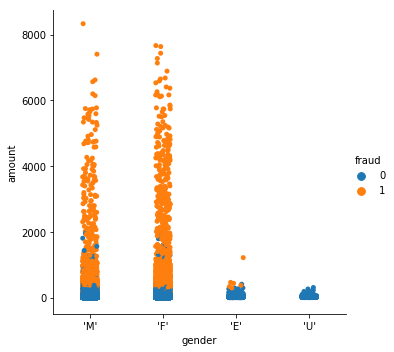

In [13]:
# EDA : 2. Gender
# c : Catplot Vizualization of Fraud by Gender
sns.catplot(x="gender", y="amount", hue="fraud", data=df_raw)

# Descriptive Analysis

In [14]:
# DA 1. Extracting # of unique entires per column and their sample values
num_unique = []
sample_col_values = []
for col in df_raw.columns:
    num_unique.append(len(df_raw[col].unique()))  # Counting number of unique values per each column
    sample_col_values.append(df_raw[col].unique()[:3])  # taking 3 sample values from each column        

In [15]:
# DA 2. Joining Character
col_combined_entries = []
for cvi in sample_col_values:
    col_combined_entries.append(",".join(str(cvi)))

In [16]:
# DA 3. Generating a list 'param_nature' that distinguishes features and targets
param_nature = []
for col in df_raw.columns:
    if col == 'fraud':
        param_nature.append('Target')
    else:
        param_nature.append('Feature')

In [17]:
# DA 4. Vizualize Summary Whole Description
df_feature_overview = pd.DataFrame(np.transpose([param_nature, num_unique, col_combined_entries]), index = df_raw.columns, columns = ['Parameter Nature', '# of Unique Entries', 'Sample Entries (First three values)'])
df_feature_overview

,Parameter Nature,# of Unique Entries,Sample Entries (First three values)
step,Feature,180,"[,0, ,1, ,2,]"
customer,Feature,4112,"[,"",',C,1,0,9,3,8,2,6,1,5,1,',"", ,"",',C,3,5,2,..."
age,Feature,8,"[,"",',4,',"", ,"",',2,',"", ,"",',3,',"",]"
gender,Feature,4,"[,"",',M,',"", ,"",',F,',"", ,"",',E,',"",]"
zipcodeOri,Feature,1,"[,"",',2,8,0,0,7,',"",]"
merchant,Feature,50,"[,"",',M,3,4,8,9,3,4,6,0,0,',"", ,"",',M,1,8,2,3,..."
zipMerchant,Feature,1,"[,"",',2,8,0,0,7,',"",]"
category,Feature,15,"[,"",',e,s,_,t,r,a,n,s,p,o,r,t,a,t,i,o,n,',"", ,..."
amount,Feature,23767,"[, ,4,.,5,5, ,3,9,.,6,8, ,2,6,.,8,9,]"
fraud,Target,2,"[,0, ,1,]"


In [18]:
# DA 5. Check type of each Column
df_raw.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

Encoding using simple pythonic function in pandas with Series.cat.codes

In [19]:
#DA 6. Encoding
df = df_raw
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df.dtypes

step             int64
customer         int16
age               int8
gender            int8
zipcodeOri        int8
merchant          int8
zipMerchant       int8
category          int8
amount         float64
fraud            int64
dtype: object

In [20]:
# DA 7. Summary of Description Dataset
df.describe(include='all')

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.0,594643.000000,594643.0,594643.000000,594643.000000,594643.000000
mean,94.986827,2042.317776,3.014151,1.451089,0.0,23.866580,0.0,11.066393,37.890135,0.012108
std,51.053632,1185.491845,1.335884,0.503291,0.0,8.590215,0.0,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,52.000000,1020.000000,2.000000,1.000000,0.0,18.000000,0.0,12.000000,13.740000,0.000000
50%,97.000000,2030.000000,3.000000,1.000000,0.0,18.000000,0.0,12.000000,26.900000,0.000000
75%,139.000000,3059.000000,4.000000,2.000000,0.0,30.000000,0.0,12.000000,42.540000,0.000000
max,179.000000,4111.000000,7.000000,3.000000,0.0,49.000000,0.0,14.000000,8329.960000,1.000000


In [21]:
# DA 8. Num of Target
num_obs = len(df)
class_counts = df.groupby('fraud').size()
print("Total Number of observations: ", num_obs)
print(class_counts)

Total Number of observations:  594643
fraud
0    587443
1      7200
dtype: int64


Try to understand the pattern of dataset using some of vizualization for each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82aca50be0>,
      dtype=object)

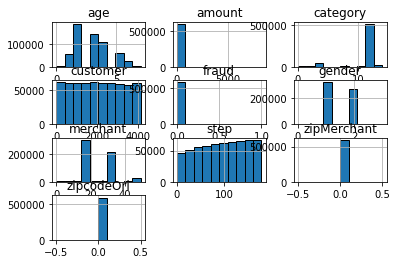

In [22]:
# DA 9. Vizualize Histogramable
df.hist(edgecolor='black')

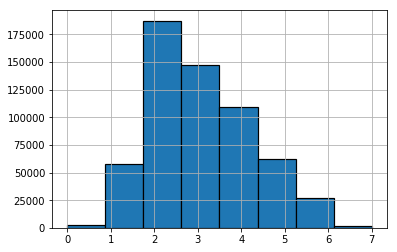

In [23]:
df['age'].hist(bins=8, edgecolor='black', linewidth=1.2)

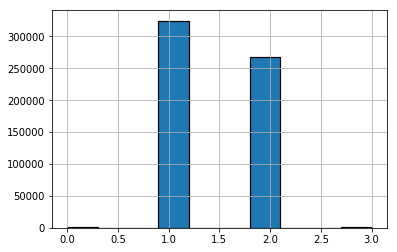

In [24]:
df['gender'].hist(edgecolor='black', linewidth=1.2)

In [25]:
'''
sns.pairplot(df, hue = 'fraud', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
'''

"\nsns.pairplot(df, hue = 'fraud', diag_kind = 'kde',\n             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},\n             size = 4)\n"

Pearson Correlation is given by:  ρ=cov(X,Y)/σx.σy 
The values are between -1 and +1. A value of -1 means negative correlation and +1 means positive correlation. 
0 means no correlation. Dividing covariance by product of standard deviations.

In [26]:
# DA 10. Coefficien Correlation with pearson method
corr = df.corr(method='pearson')
print(corr)

                 step  customer       age    gender  zipcodeOri  merchant  \
step         1.000000  0.005082  0.001169 -0.001107         NaN -0.156195   
customer     0.005082  1.000000  0.001940 -0.007568         NaN  0.013341   
age          0.001169  0.001940  1.000000  0.005020         NaN  0.006973   
gender      -0.001107 -0.007568  0.005020  1.000000         NaN -0.007494   
zipcodeOri        NaN       NaN       NaN       NaN         NaN       NaN   
merchant    -0.156195  0.013341  0.006973 -0.007494         NaN  1.000000   
zipMerchant       NaN       NaN       NaN       NaN         NaN       NaN   
category    -0.017269  0.000166  0.004816  0.007700         NaN -0.245433   
amount      -0.007961  0.005823 -0.003930 -0.012888         NaN  0.065795   
fraud       -0.011898  0.005236 -0.004315 -0.025047         NaN  0.104532   

             zipMerchant  category    amount     fraud  
step                 NaN -0.017269 -0.007961 -0.011898  
customer             NaN  0.000166  0.

In [27]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
step,1,0.0051,0.0012,-0.0011,nan,-0.16,nan,-0.017,-0.008,-0.012
customer,0.0051,1,0.0019,-0.0076,nan,0.013,nan,0.00017,0.0058,0.0052
age,0.0012,0.0019,1,0.005,nan,0.007,nan,0.0048,-0.0039,-0.0043
gender,-0.0011,-0.0076,0.005,1,nan,-0.0075,nan,0.0077,-0.013,-0.025
zipcodeOri,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
merchant,-0.16,0.013,0.007,-0.0075,nan,1,nan,-0.25,0.066,0.1
zipMerchant,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
category,-0.017,0.00017,0.0048,0.0077,nan,-0.25,nan,1,-0.099,-0.11
amount,-0.008,0.0058,-0.0039,-0.013,nan,0.066,nan,-0.099,1,0.49
fraud,-0.012,0.0052,-0.0043,-0.025,nan,0.1,nan,-0.11,0.49,1


In [28]:
# DA 11. Skew
skew = df.skew(axis = 0, skipna = True)
print(skew)

step           -0.119428
customer        0.018576
age             0.454871
gender          0.170312
zipcodeOri      0.000000
merchant        0.515669
zipMerchant     0.000000
category       -2.567394
amount         32.365838
fraud           8.921993
dtype: float64


Find out how importance feature/variable to each other in scope whole dataset

In [29]:
# DA 12. Feature Importance
# a : Slicing dataset and import SkLearn model
array = df.values
X = array[:,0:9]
Y = array[:,9]
# Decision tree for feature importance selection
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier()
mdl.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# DA 12. Feature Importance
# b : Get the importance value
cols = df.columns.tolist()
df_fimp = pd.Series(mdl.feature_importances_ , index = cols[0:len(cols)-1]).sort_values(ascending=False)
df_fimp

amount         0.610825
merchant       0.150384
customer       0.074264
step           0.068655
category       0.066822
age            0.022609
gender         0.006441
zipMerchant    0.000000
zipcodeOri     0.000000
dtype: float64

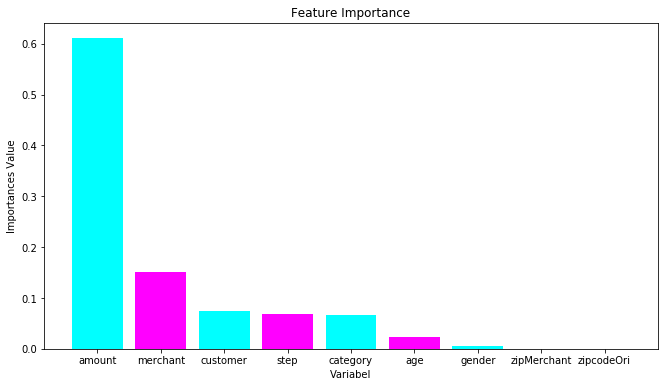

In [31]:
# DA 12. Feature Importance
# c : Vizualization of Feature Importanced

# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6, 7, 8, 9] 
  
# heights of bars 
height = df_fimp 
  
# labels for bars 
tick_label = df_fimp.index
  
# plotting a bar chart 
pyplot.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['cyan', 'magenta']) 
  
# naming the x-axis 
pyplot.xlabel('Variabel') 
# naming the y axis 
pyplot.ylabel('Importances Value') 
  
# giving a title to my graph 
pyplot.title('Feature Importance') 
  
# function to show the plot
fig = pyplot.gcf()
fig.set_size_inches(11,6)
pyplot.show()

In [32]:
# Eksport df was encoded into new dataset, for predictive analysis in the next stage
#df.to_csv('data_for_pred.csv', index=False)

In [33]:
# Get in touch the final Descriptive
is_fraud, not_fraud = df[df['fraud'] == 1], df[df['fraud'] == 0]
frauds = len(is_fraud)
no_frauds = len(not_fraud)
total_obs = len(df)

In [34]:
# For reference: https://www.kaggle.com/funkyong13/fraud-detect-visualization-to-classification

num_bins = 10
tran_amount = df['amount']
n, bins, patches = pyplot.hist(tran_amount, num_bins, normed = False, stacked = True, facecolor= '#f26a6a', alpha=0.5)
pyplot.close()
n_fraud = np.zeros(num_bins)
for i in range(num_bins):
    for j in range(frauds):
        if bins[i] < is_fraud['amount'].iloc[j] <= bins[i+1]:
            n_fraud[i] += 1
range_amount = []
for i in range(num_bins):
    lower_lim, higher_lim = str(int(bins[i])), str(int(bins[i+1]))
    range_amount.append("$ " + lower_lim + " ~ " + higher_lim )

In [35]:
df_hist = pd.DataFrame(index = range_amount)
df_hist.index.name = 'Transaction Amount[$]'
df_hist['# Total'] = n
df_hist['# Frauds'] = n_fraud
df_hist['# Safe'] = df_hist['# Total'] - df_hist['# Frauds']
df_hist['% Frauds'] = (df_hist['# Frauds'] / df_hist['# Total'] * 100).round(2)
df_hist['% Safe'] = (df_hist['# Safe'] / df_hist['# Total'] * 100).round(2)
df_hist

,# Total,# Frauds,# Safe,% Frauds,% Safe
Transaction Amount[$],,,,,
$ 0 ~ 832,593762.0,6367.0,587395.0,1.07,98.93
$ 832 ~ 1665,483.0,441.0,42.0,91.30,8.70
$ 1665 ~ 2498,118.0,112.0,6.0,94.92,5.08
$ 2498 ~ 3331,87.0,87.0,0.0,100.00,0.00
$ 3331 ~ 4164,72.0,72.0,0.0,100.00,0.00
$ 4164 ~ 4997,62.0,62.0,0.0,100.00,0.00
$ 4997 ~ 5830,34.0,34.0,0.0,100.00,0.00
$ 5830 ~ 6663,16.0,16.0,0.0,100.00,0.00
$ 6663 ~ 7496,6.0,6.0,0.0,100.00,0.00


In [36]:
print("Percentage of frauds: ", frauds/total_obs*100)
print("Percentage of no frauds: ", no_frauds/total_obs*100)

Percentage of frauds:  1.2108105199254007
Percentage of no frauds:  98.7891894800746
